ValueError: x must be increasing if s > 0

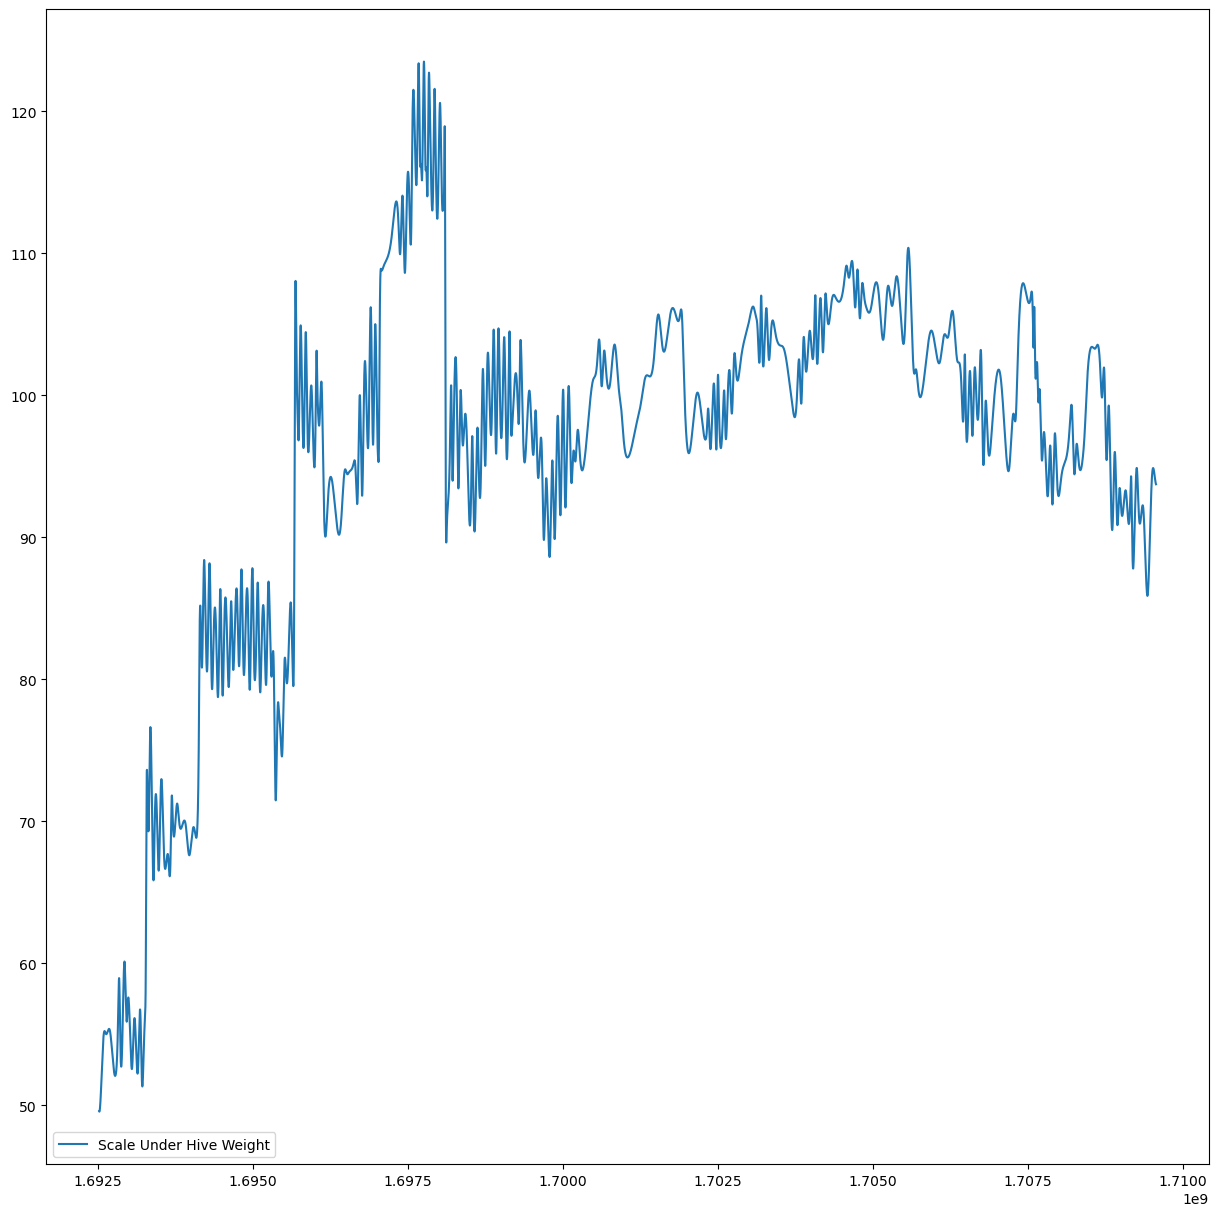

In [1]:
import os
import sys
sys.path.append("BEE_WEATHER_DATA")
from BEE_WEATHER_DATA import BROODMINDER_GET, AMBIENT_GET, BROODMINDER_PANDAS, READ_HIVE, READ_BEE_WEATHER
import pandas as pd
from glob import glob
import numpy as np
from scipy.interpolate import CubicSpline, UnivariateSpline
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

hive_name = "New Left Hive"

# Bee_Weather = READ_BEE_WEATHER()
# display(Bee_Weather)

def PROCESS_HIVE(hive_name):
    metrics = ["Weight", "Humidity", "Temperature"]
    Hive = READ_HIVE(hive_name)
    Unique_Dev_Names = Hive.Hive_Position.unique()
    Unique_Devs = Hive.Device.unique()
    Devices = {}
    Graph = 1
    for i, Device in enumerate(Unique_Devs):
        for j, metric in enumerate(metrics):
            Devices.update({Unique_Dev_Names[i]: Hive[Hive['Device'] == Device]})

            # Resample and cubic-spline-interpolate to five minutes
            x = Devices[list(Devices.keys())[i]]["Unix_Time"]
            y = Devices[list(Devices.keys())[i]][str(metrics[j])]
            Devices[list(Devices.keys())[i]].sort_values(by=["Unix_Time"])
            cs = UnivariateSpline(x, y)
            xs = np.arange(min(x), max(x), 300)
            Temp_DF = pd.DataFrame({
                'Unix_Time': xs,
                str('Interp_' + metrics[j]): cs(xs),
            })
            Devices[list(Devices.keys())[i]] = pd.concat([Temp_DF, Devices[list(Devices.keys())[i]]], axis=0, join='outer').drop_duplicates(subset=['Unix_Time'], keep='last').reset_index(drop=True)
            Devices[list(Devices.keys())[i]].sort_values(by=["Unix_Time"])
            
            if not np.isnan(Devices[list(Devices.keys())[i]][str("Interp_" + metrics[j])]).all() and Graph:
                fig, ax = plt.subplots(figsize=(15, 15))
                ax.plot(Devices[list(Devices.keys())[i]]["Unix_Time"], Devices[list(Devices.keys())[i]][str("Interp_" + metrics[j])], label=str(Unique_Dev_Names[i] + ' ' + metrics[j]))
                ax.legend(loc='lower left', ncol=2)
    #plt.show()
    
    return Devices

Devices = PROCESS_HIVE(hive_name)
display(Devices["Scale Under Hive"])
    
def PROCESS_BEE_WEATHER():
    HiveWeather = HiveWeather.set_index('Unix_Time',drop = False)
    HiveWeather_upsampled = HiveWeather.resample('1s').mean()
    HiveWeather_interpolated = HiveWeather_upsampled[HiveWeather_upsampled.columns[1::]].interpolate(method='linear')
    HiveWeather_downsampled = HiveWeather_interpolated.resample('300s').mean()

In [28]:
print(directory[0:-1] + "\/" + "New Left Hive_combined_readings_20[a-zA-Z0-9\-\_\.]*.csv")

Broodminder\/\/New Left Hive_combined_readings_20[a-zA-Z0-9\-\_\.]*.csv


In [15]:
metrics = ["Weight", "Humidity", "Temperature"]
print(all(Devices[list(Devices.keys())[1]][metrics[0]] == np.nan))

False


In [3]:
for k in range(5):
    print(k % 2)

0
1
0
1
0
